# Data

In [27]:
#mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#mengimpor dataset yang sudah didownload dari kaggle
df = pd.read_csv('nyc-rolling-sales.csv')

In [29]:
#melihat data setnya 5 teratas
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [30]:
#menghapus kolom-kolom atau parameter yang tidak mau digunakan
hapus_df = df.drop(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE'], axis=1)
hapus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   BUILDING CLASS AT PRESENT       84548 non-null  object
 6   RESIDENTIAL UNITS               84548 non-null  int64 
 7   COMMERCIAL UNITS                84548 non-null  int64 
 8   TOTAL UNITS                     84548 non-null  int64 
 9   LAND SQUARE FEET                84548 non-null  object
 10  GROSS SQUARE FEET               84548 non-null  object
 11  YEAR BUILT                      84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       84548 non-null

In [31]:
#melakukan cleaning data dengan mencari duplicated data
sum(hapus_df.duplicated())

2751

In [32]:
#menghapus data yang terduplicated
hapus_df = hapus_df.drop_duplicates()
sum(hapus_df.duplicated())

0

In [33]:
#pada dataset, banyak nilai "-", akan lebih baik jika dijadikan 0 saja seperti instruksi yang ada di Kaggle, sebagai berikut
#Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
hapus_df.replace(' -  ', 0,  inplace=True)
hapus_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [34]:
#banyak missing values juga berupa Nan, diubah juga ke 0
hapus_df.replace(np.nan,0, inplace=True)
hapus_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [35]:
#karena angka sale pricenya besar, akan lebih memudahkan jika mengubah skalanya dengan dibagi 1 juta dollar
hapus_df['SALE_PRICE_BARU'] = hapus_df['SALE PRICE'].astype(np.float64) / 1000000
hapus_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE_BARU
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,6.625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,0.000000
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,0.000000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,3.936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,0.450000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,0.550000
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,0.460000
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,11.693337


In [36]:
#saya berinisiatif untuk membuat dataset baru yaitu copy dari dataset lama
data_copy = hapus_df.copy()

#lalu, menghapus semua data 0
data_copy = data_copy[data_copy["SALE_PRICE_BARU"] != 0]

In [37]:
data_copy.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE_BARU
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,6.625000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,3.936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,8.000000
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,C4,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00,3.192840
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,D9,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00,16.232000


In [38]:
data_copy.shape

(59354, 17)

# Mean

In [39]:
#menghitung mean dari kolom sale price di dataset baru
sale_price_mean_baru = data_copy["SALE PRICE"].mean()
print("Mean SALE PRICE:", sale_price_mean_baru)

Mean SALE PRICE: inf


# Median

In [40]:
#menghitung median dari kolom sale price di dataset baru
sale_price_median_baru = data_copy["SALE PRICE"].median()
print("Median SALE PRICE:", sale_price_median_baru)

Median SALE PRICE: 630000.0


# Modus

In [41]:
#mencari nilai modus dari kolom sale price dari dataset baru
sale_price_mode_baru = data_copy["SALE PRICE"].mode()

print("Mode SALE PRICE:", sale_price_mode_baru)
#ternyata, nilai modus atau data yang sering muncul adalah 10

Mode SALE PRICE: 0    10
Name: SALE PRICE, dtype: object


In [42]:
#memastikan apakah benar?
sale_price_counts = data_copy['SALE PRICE'].value_counts()
print(sale_price_counts)

#ternyata memang benar ada 718 data yang sale pricenya 10 dollar

10         718
450000     426
550000     415
650000     410
600000     407
          ... 
1078073      1
969500       1
324250       1
3871895      1
69300        1
Name: SALE PRICE, Length: 10006, dtype: int64


In [43]:
#mencari tahu apa identifikasi bangunan dengan harga murah
rows_with_sale_price_10 = data_copy[data_copy['SALE PRICE'] == 10]

#menampilkan hasil
print(rows_with_sale_price_10)

#ternyata, dengan harga semurah itu, untuk bangunan lama yang sudah dibangun dari tahun 1920-1985

Empty DataFrame
Columns: [BOROUGH, NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BLOCK, BUILDING CLASS AT PRESENT, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, TAX CLASS AT TIME OF SALE, BUILDING CLASS AT TIME OF SALE, SALE PRICE, SALE DATE, SALE_PRICE_BARU]
Index: []


In [44]:
#memastikan dengan melihat data lain, contohnya dengan harga yang jauh lebih tinggi
rows_with_sale_price = data_copy[data_copy['SALE PRICE'] == 1078073]

#menampilkan hasil
print(rows_with_sale_price)

#terbukti bahwa bangunan dengan harga tinggi merupakan bangunan agak baru, contohnya ini dibuat pada tahun 2006

Empty DataFrame
Columns: [BOROUGH, NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BLOCK, BUILDING CLASS AT PRESENT, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, TAX CLASS AT TIME OF SALE, BUILDING CLASS AT TIME OF SALE, SALE PRICE, SALE DATE, SALE_PRICE_BARU]
Index: []


# Range

In [45]:
#range di dataset baru
min_sale_priceb = data_copy["SALE PRICE"].min()
max_sale_priceb = data_copy["SALE PRICE"].max()

print("Minimum SALE PRICE", min_sale_priceb)
print("Maximum SALE PRICE", max_sale_priceb)

Minimum SALE PRICE 1
Maximum SALE PRICE 9999999


In [46]:
#mencari tahu apakah ada harga 1 dollar
rows_with_sale_prices = data_copy[data_copy['SALE PRICE'] == 1]

#menampilkan hasil
print(rows_with_sale_prices)

#ternyata memang benar ada, bahkan lebih dari satu

Empty DataFrame
Columns: [BOROUGH, NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BLOCK, BUILDING CLASS AT PRESENT, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, TAX CLASS AT TIME OF SALE, BUILDING CLASS AT TIME OF SALE, SALE PRICE, SALE DATE, SALE_PRICE_BARU]
Index: []


In [48]:
data_rangeb = 9999999 - 1
print("Range SALE PRICE", data_rangeb)

Range SALE PRICE 9999998


# Variance

In [50]:
#mencari nilai varians dari kolom sale price di dataset baru
data_copy["SALE PRICE"] = pd.to_numeric(data_copy["SALE PRICE"], errors='coerce')
var_sale_price_baru = data_copy["SALE PRICE"].var()
print("Varians SALE PRICE:", var_sale_price_baru)

Varians SALE PRICE: 152893456067654.53


# Standard Deviation

In [51]:
#mencari nilai standar deviasi dari kolom sale price di dataset baru 
std_price_sale_baru = data_copy["SALE PRICE"].std()
print("Standard Deviation SALE PRICE:", std_price_sale_baru)

Standard Deviation SALE PRICE: 12365009.343613718


# Probability Distribution

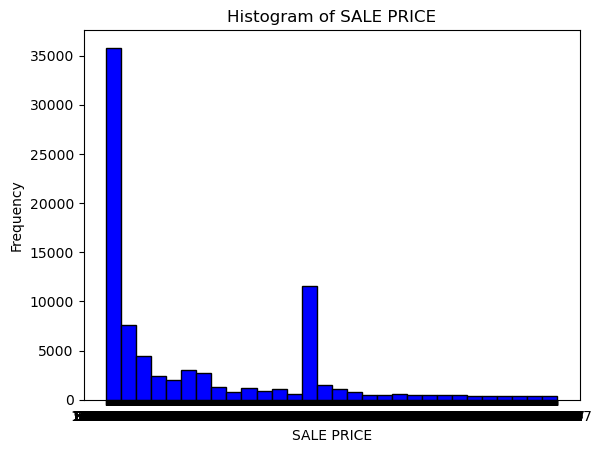

In [52]:
# visualisasi histogram
plt.hist(df["SALE PRICE"], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of SALE PRICE")
plt.xlabel("SALE PRICE")
plt.ylabel("Frequency")
plt.show()

#terlihat bahwa histogramnya positively skewed 
#distribusi yang positif arah atau positively skewed mengindikasikan bahwa ekor distribusi lebih panjang di sebelah kanan dan nilai ekstrim cenderung berada di sebelah kanan distribusi.

In [57]:
#memeriksa nilai skewness atau kemiringan dan kurtosis
skewness = data_copy["SALE PRICE"].skew()
kurtosis = data_copy["SALE PRICE"].kurtosis()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 114.76910664950516
Kurtosis: 18336.697608086266


In [58]:
#fitting dengan exponential distribution
from scipy.stats import expon

data_copy["SALE PRICE"] = pd.to_numeric(data_copy["SALE PRICE"], errors='coerce')
data_copy = data_copy.dropna(subset=["SALE PRICE"])

# Fit distribusi eksponensial
loc, scale = expon.fit(data_copy["SALE PRICE"])

# Display hasil fitting
print("Parameter Distribusi Eksponensial:")
print("Loc:", loc)
print("Scale:", scale)

Parameter Distribusi Eksponensial:
Loc: 1.0
Scale: 1499864.6335209084


# Confidence Interval

In [59]:
from scipy.stats import expon
from sklearn.utils import resample

# Function to compute bootstrap confidence interval
def bootstrap_ci(data, statistic, alpha=0.95, n_bootstrap=1000):
    """
    Compute bootstrap confidence interval for a given statistic.

    Parameters:
    - data: Original data
    - statistic: Function to compute the statistic of interest
    - alpha: Confidence level (e.g., 0.95 for a 95% CI)
    - n_bootstrap: Number of bootstrap samples

    Returns:
    - Tuple containing lower and upper bounds of the confidence interval
    """
    bootstrap_samples = np.array([
        statistic(resample(data)) for _ in range(n_bootstrap)
    ])
    lower_bound = np.percentile(bootstrap_samples, (1 - alpha) / 2 * 100)
    upper_bound = np.percentile(bootstrap_samples, (1 + alpha) / 2 * 100)
    return lower_bound, upper_bound


# Bootstrap confidence interval for the scale parameter
ci_lower, ci_upper = bootstrap_ci(data_copy["SALE PRICE"], lambda x: expon.fit(x)[1])

# Display confidence interval
print("Bootstrap Confidence Interval for Scale Parameter:")
print("Lower Bound:", ci_lower)
print("Upper Bound:", ci_upper)

Bootstrap Confidence Interval for Scale Parameter:
Lower Bound: 1416418.2616260068
Upper Bound: 1607942.085335866


# Normality Test

In [61]:
#Shapiro Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(data_copy["SALE PRICE"].dropna())
print("stat=%.3f, p=%.3f" % (stat, p))

if p > 0.05:
    print("Probably Gaussian")
else:
    print("Probably not Gaussian")

stat=0.039, p=0.000
Probably not Gaussian


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
# D'Agostino's K^2 Test
from scipy.stats import normaltest
stat, p = normaltest((data_copy["SALE PRICE"].dropna()))
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
    print("Probably Gaussian")
else:
    print("Probably not Gaussian")

stat=246193.005, p=0.000
Probably not Gaussian


In [66]:
# Anderson-Darling Test
from scipy.stats import anderson
result = anderson((data_copy["SALE PRICE"].dropna()))
print("stat=%.3f" % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print("Probbaly gaussian at the %.1f%% level" % (sl))
    else:
        print("Probbaly not gaussian at the %.1f%% level" % (sl))

stat=18585.288
Probbaly not gaussian at the 15.0% level
Probbaly not gaussian at the 10.0% level
Probbaly not gaussian at the 5.0% level
Probbaly not gaussian at the 2.5% level
Probbaly not gaussian at the 1.0% level


# Kesimpulan
Dari data penjualan properti di NYC, kita dapat melihat bahwa harga rata-rata (mean) properti adalah 1,499,865.63, sementara harga mediannya adalah 630,000. Distribusi harga properti menunjukkan kecenderungan skewness positif dengan nilai 114.77, menunjukkan bahwa ekor distribusi lebih panjang di sebelah kanan, dan nilai ekstrim cenderung berada di sisi kanan distribusi. Hal ini sesuai dengan temuan bahwa terdapat 718 properti yang dijual dengan harga hanya 10, menciptakan distribusi yang skewed ke arah nilai yang lebih tinggi. Rentang harga properti yang sangat besar, yaitu 2,209,999,999, juga mencerminkan keragaman besar dalam data. Varians dan deviasi standar yang tinggi, masing-masing sekitar 152,893,456,067,654.53 dan 12,365,009.34, menunjukkan sebaran data yang signifikan. Distribusi ini juga dikuatkan oleh kurtosis yang tinggi, yaitu 18,336.70. Selanjutnya, kita menggunakan model distribusi eksponensial untuk mengestimasi parameter distribusi dengan hasil loc=1.0 dan scale=1,499,864.63. Dalam hal ini, kita dapat memiliki keyakinan bahwa 95% confidence interval untuk scale parameter berada di antara 1,412,284.27 dan 1,610,809.32. Kesimpulannya, data penjualan properti di NYC menunjukkan keragaman dan skewness yang signifikan, dengan fokus pada harga properti yang lebih tinggi.